In [1]:
import os
from snudda.simulate.network_pair_pulse_simulation import SnuddaNetworkPairPulseSimulation
n_dSPN = 5
n_iSPN = 5
n_FS = 2
n_LTS = 2
n_ChIN = 2

hold_v = -80e-3    # Holding voltage
max_dist = 100e-6  # Only look at pairs closer than this distance
GABA_rev = -60e-3  # GABA reversal potential

cur_inj = 10e-9

network_path = os.path.join("networks","pair_pulse_simulation")
volume_type="cube"
side_len = 200e-6

In [2]:
pps = SnuddaNetworkPairPulseSimulation(network_path=network_path,
                                       exp_type="Planert2010",
                                       pre_type="FS",
                                       post_type="ALL",
                                       max_dist=max_dist,
                                       hold_voltage=hold_v,
                                       current_injection = cur_inj)

Checking depolarisation/hyperpolarisation of FS to ALL synapses


In [ ]:
pps.setup(n_dSPN=n_dSPN, n_iSPN=n_iSPN,
          n_FS=n_FS, n_LTS=n_LTS, n_ChIN=n_ChIN,
          volume_type=volume_type,
          side_len=side_len)

In [ ]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [ ]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

In [ ]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

Compile neuron modules

In [ ]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

To run in parallel instead of the cell below, run this in the ```examples/notebooks``` folder:
```
mpiexec python3 ../../snudda/simulate/network_pair_pulse_simulation.py run Planert2010 networks/pair_pulse_simulation --pre FS
```

In [ ]:
pps.run_sim(gaba_rev=GABA_rev)

Plot results

Loading 16 neurons with 189 synapses and 2 gap junctions
Number of pairs excluded, distance > 100.0 mum : 0
Min amp: 0.005884
Max amp: 0.014328900000000006
Mean amp: 0.009382262500000004 +/- 0.0024561948039281732
Amps: [0.0143289 0.0099328 0.0106353 0.0104522 0.0080002 0.0068384 0.005884
 0.0089863]


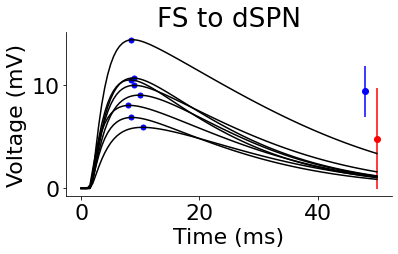

<Figure size 432x288 with 0 Axes>

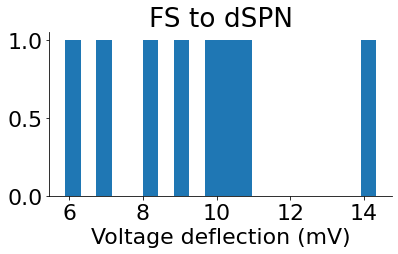

<Figure size 432x288 with 0 Axes>

In [3]:
pps.analyse(post_type="dSPN")

Loading 16 neurons with 189 synapses and 2 gap junctions
Number of pairs excluded, distance > 100.0 mum : 0
Min amp: 0.0017854999999999954
Max amp: 0.012089000000000003
Mean amp: 0.005637742857142858 +/- 0.0032682687155028605
Amps: [0.0084451 0.0051821 0.012089  0.0028779 0.004864  0.0017855 0.0042206]


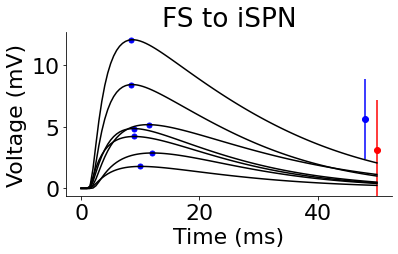

<Figure size 432x288 with 0 Axes>

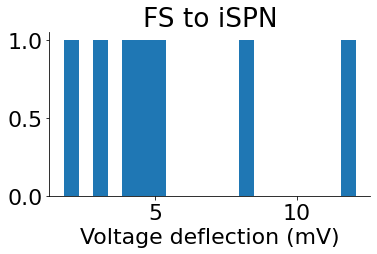

<Figure size 432x288 with 0 Axes>

In [4]:
pps.analyse(post_type="iSPN")